## <u> Step 3 - Climate Analysis and Exploration </u>

In [1]:
from sqlalchemy import func,asc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import emoji
warnings.filterwarnings('ignore')

# <u>Set-Up</u>

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

session = Session(engine)

In [3]:
Base = automap_base()
Base.prepare(engine,reflect=True)
Measurments = Base.classes.measurments
Stations = Base.classes.stations

In [4]:
Base.classes.keys()

['measurments', 'stations']

# <u>Vacation Analysis</u>

### Observed Temperature and Precipation for 10-01-2016 to 10-10-2016

In [5]:
#numbers of vacation days
total_vacation_days = session.query(Measurments.date).\
filter(Measurments.date >= '2016-10-01').\
filter(Measurments.date <= '2016-10-10').order_by(Measurments.date.asc()).distinct().count()

#print statement
print('I have decided to go on a {} day vacation !!!'.format(total_vacation_days))

I have decided to go on a 10 day vacation !!!


In [6]:
query_temp_weather_for_vacation =session.query(Measurments.date, Measurments.tobs,Measurments.prcp).\
filter(Measurments.date >= '2016-10-01').\
filter(Measurments.date <= '2016-10-10').order_by(Measurments.date.asc()).all()

In [7]:
temp_vacaction_list = []
date_vacation_list = []
prcp_vacation_list = []

for date_vac,temp_vac,prcp_vac in query_temp_weather_for_vacation:
    date_vacation_list.append(date_vac)
    temp_vacaction_list.append(temp_vac)
    prcp_vacation_list.append(prcp_vac)
    
df_temp_weather_for_vacation= pd.DataFrame({"Date_Vacation":date_vacation_list,
              "Vacation_TOBS": temp_vacaction_list,
              "Vacation_PRCP": prcp_vacation_list})

df_temp_weather_for_vacation['Date_Vacation'] = pd.to_datetime(df_temp_weather_for_vacation['Date_Vacation'])

df_temp_weather_for_vacation.set_index(keys='Date_Vacation',inplace=True)

### Plot for  Observed Temperature and Precipation between 10-01-2016 to 10-10-2016

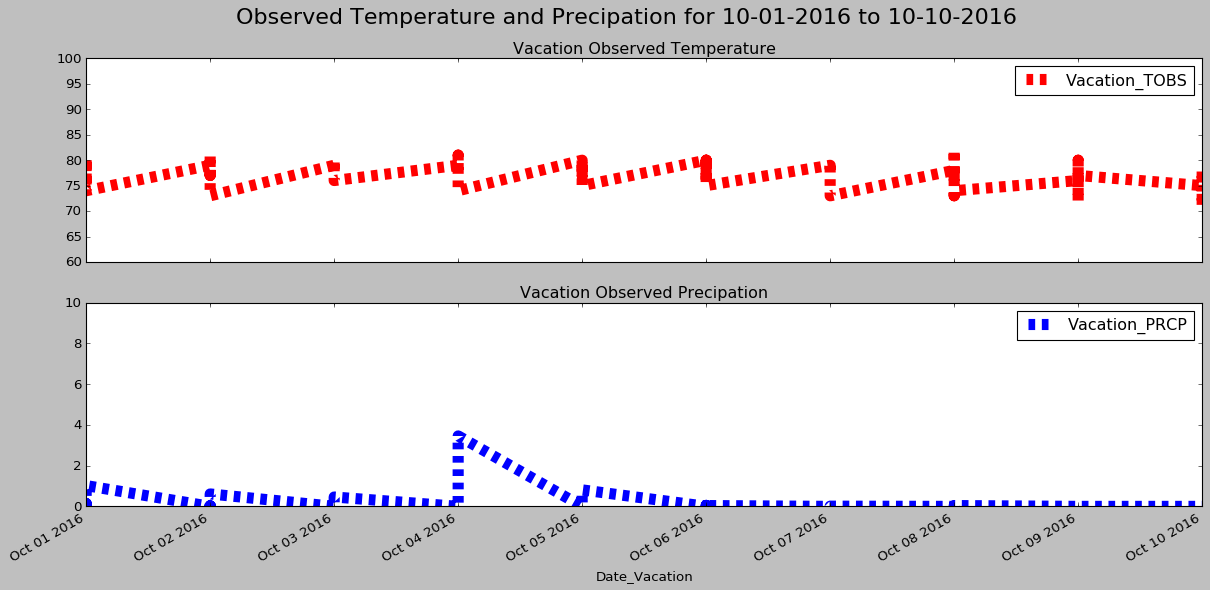

In [8]:
plt.style.use('classic')

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
df_temp_weather_for_vacation.Vacation_TOBS.plot(ax=ax1,figsize=(18,8),ls='--',lw=10,color='r',legend=True,title='Vacation Observed Temperature',ylim=(60,100))
df_temp_weather_for_vacation.Vacation_PRCP.plot(ax=ax2,figsize=(18,8),ls='--',lw=10,legend=True,title='Vacation Observed Precipation',ylim=(0,10));

fig.suptitle('Observed Temperature and Precipation for 10-01-2016 to 10-10-2016',size=20);

# <u>Precipitation Analysis</ul>

###  Design a query to retrieve the last 12 months of precipitation data.

In [9]:
precip_measurments_2016 =session.query(Measurments.date,Measurments.prcp).\
filter(Measurments.date.between('2016-01-01','2016-12-31')).all()

In [10]:
dates_list = []
precip_list = []

for dates,precip in precip_measurments_2016:
    dates_list.append(dates)
    precip_list.append(precip)
    

In [11]:
df_precip_measurments_2016= pd.DataFrame({'dates':dates_list,'precipitation':precip_list})

df_precip_measurments_2016['dates'] = pd.to_datetime(df_precip_measurments_2016['dates'])

df_precip_measurments_2016.set_index(['dates'],inplace=True)

In [12]:
df_greater_1_inch =df_precip_measurments_2016[df_precip_measurments_2016['precipitation'] >= 1]
df_less_1_inch =df_precip_measurments_2016[df_precip_measurments_2016['precipitation'] <= 1]
df_at_1_inch =df_precip_measurments_2016[df_precip_measurments_2016['precipitation'] == 1]

## Plot Hawaii Rainfall for 2016

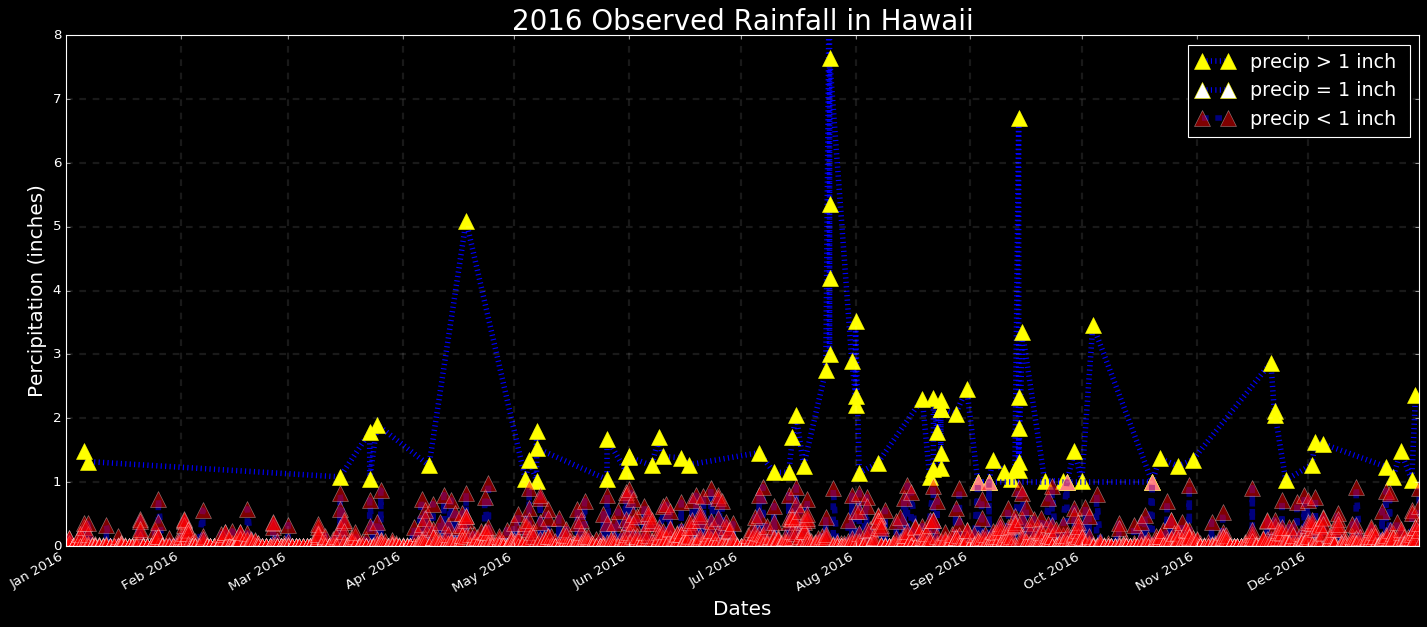

In [13]:
plt.style.use('dark_background')

df_greater_1_inch.precipitation.plot(c='b',figsize=(18,8),ls=':',lw=(5),marker='^',grid=True,label='precip > 1 inch ',markerfacecolor='yellow',ms=15,markeredgecolor='yellow')
df_at_1_inch.precipitation.plot(c='b',figsize=(18,8),ls=':',lw=(5),marker='^',label='precip = 1 inch',markerfacecolor='white',ms=15,markeredgecolor='yellow')
df_less_1_inch.precipitation.plot(c='b',figsize=(18,8),ls='--',lw=(5),marker='^',grid=True,label='precip < 1 inch ', markerfacecolor='red',ms=15,markeredgecolor='white',alpha=.5)

plt.xlabel('Dates',fontsize=(18))
plt.ylabel('Percipitation (inches)',fontsize=(18));
plt.title('2016 Observed Rainfall in Hawaii',fontsize=(25));
plt.legend(fontsize='x-large')
plt.ylim(0,8)
plt.grid(color='white', linestyle='--', linewidth=2,alpha=.1)
plt.tight_layout()



## Summary for Hawaii Rainfall for 2016

In [14]:
df_precip_measurments_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,2069.0,0.179845,0.506363,0.0,0.0,0.02,0.15,9.64


# <u>Station Analysis</u>

### Design a query to calculate the total number of stations

In [15]:
print('There are {} weather stations in hawaii'.format(session.query(Stations.station).count()))

There are 9 weather stations in hawaii


###  Design a query to find the most active stations

In [16]:
most_active_stations = session.query(Stations.station,func.count(Stations.station))\
.order_by(func.count(Stations.station))\
.join(Measurments)\
.group_by(Stations.station).all()

In [17]:
each_station_list = []
active_value_list = []

for each_station,active_value in most_active_stations:
    each_station_list.append(each_station)
    active_value_list.append(active_value)
    


df_station_activity = pd.DataFrame({'Activity Count': active_value_list,'Station_id': each_station_list})


df_station_activity = df_station_activity[[ 'Station_id','Activity Count']]

df_station_activity

,Station_id,Activity Count
0,USC00518838,342
1,USC00517948,683
2,USC00511918,1932
3,USC00514830,1937
4,USC00516128,2484
5,USC00519523,2572
6,USC00519397,2685
7,USC00513117,2696
8,USC00519281,2772


##  *USC00519281 is the most active station*

### <u>Plot Most Active Stations Dataframe</u>

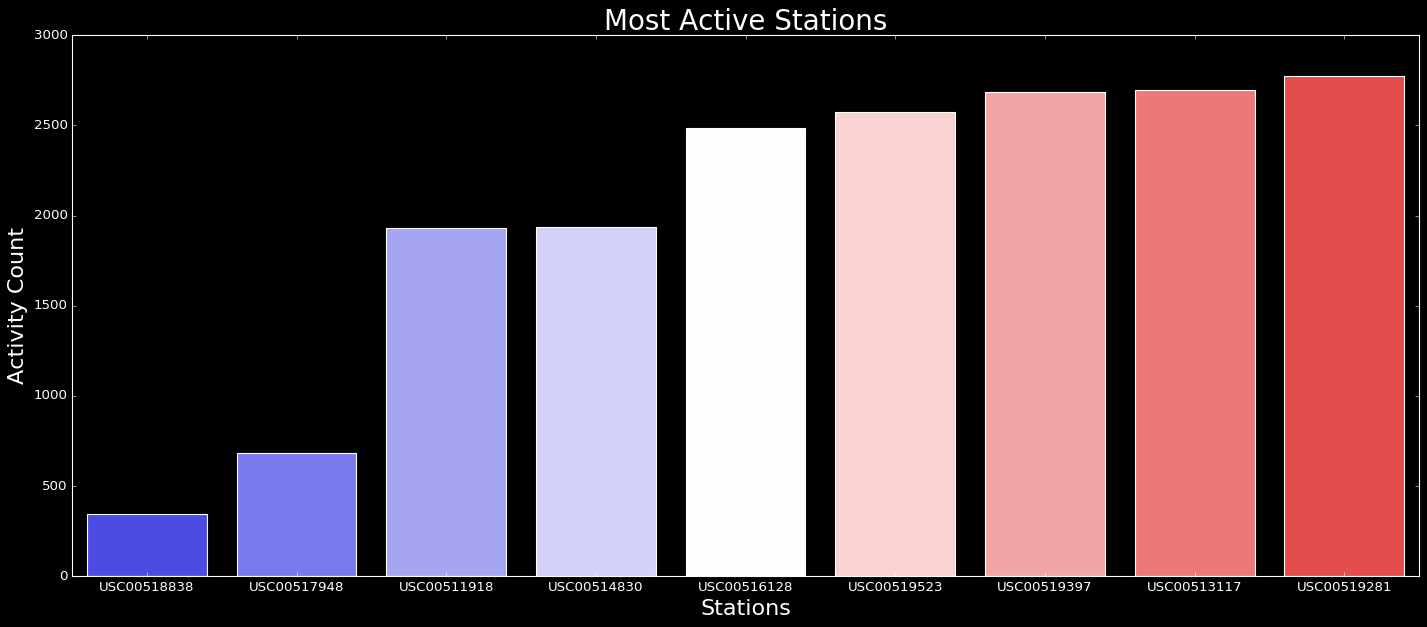

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(18,8))
sns.barplot(x='Station_id',y='Activity Count',data=df_station_activity,palette='bwr')
plt.xlabel('Stations',fontsize=(20))
plt.ylabel('Activity Count',fontsize=(20));
plt.title('Most Active Stations',fontsize=(25));
plt.legend(fontsize='x-large')
plt.tight_layout()

![](pic/map.png)

### Design a query to retrieve the last 12 months of temperature observation data (tobs).

In [19]:
temp_measurments_2016 =session.query(Measurments.date,Measurments.tobs).\
filter(Measurments.date.between('2016-01-01','2016-12-31')).all()

In [20]:
dictionary_2016_Tobs = dict(temp_measurments_2016)

In [21]:
#create empty list for dates and temps
each_date_list = []
temp_list = []

#generate empty list for temp
for each_date,temp in temp_measurments_2016:
    each_date_list.append(each_date)
    temp_list.append(temp)
    
    

#create dataframe 
df_temp_2016_hawaii = pd.DataFrame({'Date': each_date_list,
                                    'Temp': temp_list})


#save column as datetime 
df_temp_2016_hawaii['Date'] = pd.to_datetime(df_temp_2016_hawaii['Date'])



df_temp_2016_hawaii.set_index(keys=['Date'],inplace=True)

In [22]:
df_temp_2016_hawaii_above_70 = df_temp_2016_hawaii[df_temp_2016_hawaii['Temp'] >= 70]

df_temp_2016_hawaii_below_70 = df_temp_2016_hawaii[df_temp_2016_hawaii['Temp'] <= 70]

### Plot for 2016 Observed Temperatures in Hawaii

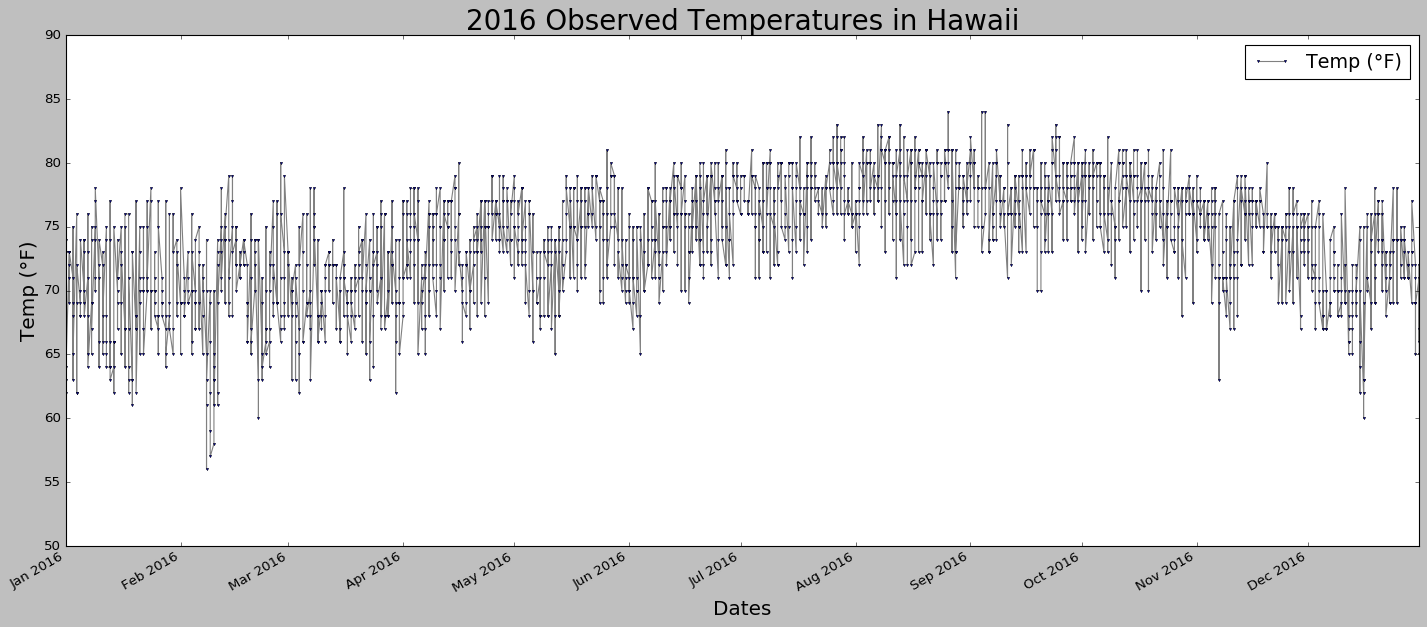

In [23]:
plt.style.use('classic')



df_temp_2016_hawaii.plot(c='gray',marker='v',legend=True, ms=2,markerfacecolor='blue',figsize=(18,8));

plt.xlabel('Dates',fontsize=(18))


plt.ylabel('Temp (°F)',fontsize=(18));
plt.title('2016 Observed Temperatures in Hawaii',fontsize=(25));
plt.legend(['Temp (°F)'],fontsize='x-large')
plt.ylim(50,90);
plt.tight_layout();



In [64]:
df_temp_2016_hawaii.var()

Temp    19.968016
dtype: float64

In [24]:
df_temp_2016_hawaii.describe()

,Temp
count,2069.000000
mean,74.085549
std,4.468559
min,56.000000
25%,71.000000
50%,75.000000
75%,77.000000
max,84.000000


### In 2015, the average temperature in Hawaii was 74.1 °F with variation of +/- 19.9 °F. This sounds like perfect weather to me. 

In [25]:
print(emoji.emojize('Hawaii gets two :thumbsup: :thumbsup:\
and two raised :raised_hand: :raised_hand:.', use_aliases=True))

Hawaii gets two 👍 👍and two raised ✋ ✋.


### Filter by the station with the highest number of observations.

In [26]:
Station_highest_obersations = session.query(Measurments.date,Measurments.tobs,Measurments.station).\
filter(Measurments.date.between('2016-01-01','2016-12-31')).filter_by(station='USC00519281')\
.all()

In [27]:
all_date_list_obs = []
all_temp_list_obs = []
station_id_list_obs = []


for all_date_obs,all_temp_obs,station_id_obs in Station_highest_obersations:
    all_date_list_obs.append(all_date_obs)
    all_temp_list_obs.append(all_temp_obs)
    station_id_list_obs.append(station_id_obs)
    

In [28]:
df_Station_highest_obersations= pd.DataFrame({'Date': all_date_list_obs,
               'Temp': all_temp_list_obs,
            'station': station_id_list_obs})


df_Station_highest_obersations['Date'] = pd.to_datetime(df_Station_highest_obersations['Date'])

df_Station_highest_obersations.set_index('Date',inplace=True)

df_Station_highest_obersations = df_Station_highest_obersations[['Temp']]

df_Station_highest_obersations.head()

,Temp
Date,
2016-01-01,74
2016-01-02,72
2016-01-03,68
2016-01-04,69
2016-01-05,70


### Plot 2016 Hawaii Temperature Observations for Station USC00519281

In [29]:
df_Station_highest_obersations_greater = df_Station_highest_obersations[df_Station_highest_obersations['Temp'] >= 70]
df_Station_highest_obersations_less = df_Station_highest_obersations[df_Station_highest_obersations['Temp'] <= 70]

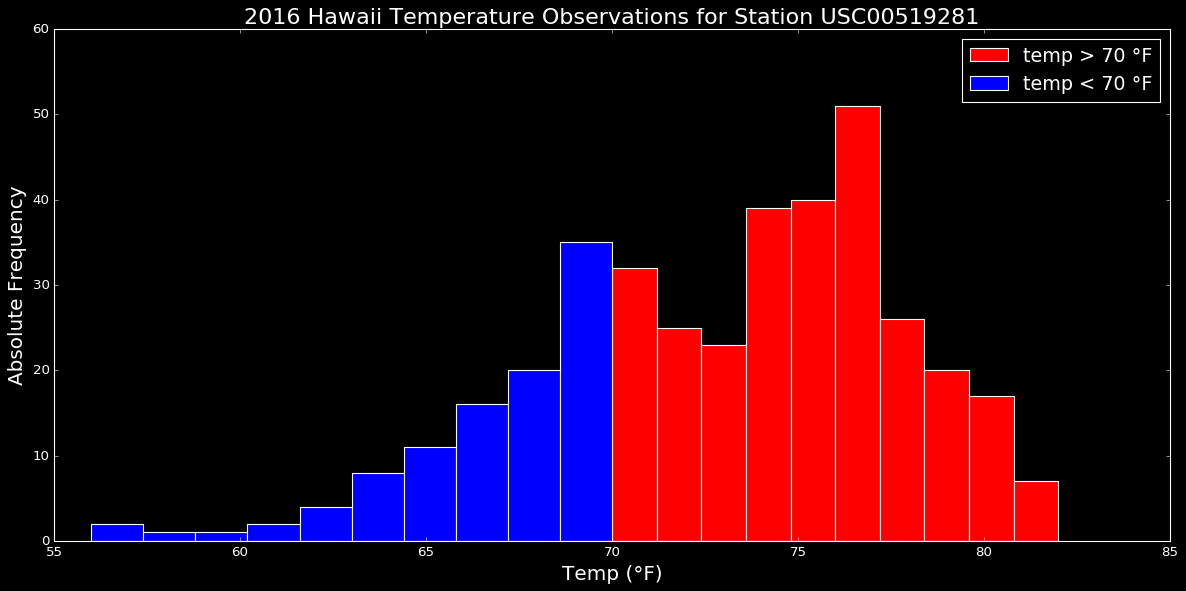

In [30]:
plt.style.use('dark_background')
plt.figure(figsize=(18,8))
df_Station_highest_obersations_greater.Temp.plot(kind='hist',color='r',label='temp > 70 °F')
df_Station_highest_obersations_less.Temp.plot(kind='hist',color='b',label='temp < 70 °F')
plt.legend(fontsize='x-large')
plt.xlabel('Temp (°F)',fontsize=(18))
plt.ylabel('Absolute Frequency',fontsize=(18))
plt.title('2016 Hawaii Temperature Observations for Station USC00519281',fontsize=(20));

# <u>Temperature Analysis</u>

### The query will return  tavg,tmin,and tmax for dates greater than or equal to input date.

In [39]:
def cal_temps0 (start_date):
    """
    The function will output the tavg,tmin,and tmax for dates greater than or equal to input date.
    
    input: Start date('YYYY-MM-DD')
            
    
    
    returns
    tmax, tmin, and tavg 
    
    """
    
    return session.query(func.avg(Measurments.tobs),func.min(Measurments.tobs),func.max(Measurments.tobs)).\
    filter(Measurments.date >= start_date).all()

In [46]:
avg_min_max_temps = cal_temps0('2016-16-03')

In [48]:
df_avg_min_max_temps = pd.DataFrame({'Avg': [avg_min_max_temps[0][0]],
                               'Min': [avg_min_max_temps[0][1]],
                               'Max': [avg_min_max_temps[0][2]]})

In [52]:
df_avg_min_max_temps = df_avg_min_max_temps.T.reset_index()

In [53]:
df_avg_min_max_temps.rename_axis({'index':'Avg\Min\Max', 0 : 'Values'},axis=1,inplace=True)

In [54]:
df_avg_min_max_temps

,Avg\Min\Max,Values
0,Avg,74.020521
1,Max,87.000000
2,Min,58.000000


In [60]:
tavg0 = avg_min_max_temps[0][0]
tmin0 = avg_min_max_temps[0][1]
tmax0 = avg_min_max_temps[0][2]

### Plot for tavg,tmin,and tmax for dates greater than or equal to input date

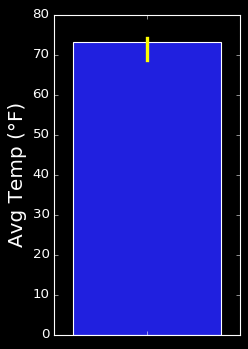

In [61]:
plt.style.use('dark_background')
plt.figure(figsize=(3,5))
sns.barplot(y='Values',data=df_avg_min_max_temps,ci=tmax0-tmin0,errwidth=3,errcolor='yellow', color='blue')
plt.ylabel('Avg Temp (°F)',fontsize=(18));

### This query will return tavg,tmin, and tmax for dates between input dates.

In [31]:
def calc_temps(start_date, end_date):
    """
    
    This query will return the tavg,tmin, and tmax for dates between input dates.
    inputs: Start date('YYYY-MM-DD')
            End date  ('YYYY-MM-DD')
    
    
    returns
    tmax, tmin, and tavg 
    
    """
    
    return session.query(func.avg(Measurments.tobs),func.min(Measurments.tobs),func.max(Measurments.tobs)).\
    filter(Measurments.date.between(start_date, end_date)).all()


In [32]:
df_avg_min_max_temps_012015_to_032016 = calc_temps('2015-01-28', '2016-01-05')

In [33]:
df_Temp_Analysis = pd.DataFrame({'Avg': [df_avg_min_max_temps_012015_to_032016[0][0]],
                               'Min': [df_avg_min_max_temps_012015_to_032016[0][1]],
                               'Max': [df_avg_min_max_temps_012015_to_032016[0][2]]})

tavg= df_avg_min_max_temps_012015_to_032016[0][0]
tmin = df_avg_min_max_temps_012015_to_032016[0][1]
tmax = df_avg_min_max_temps_012015_to_032016[0][2]

In [34]:
df_Temp_Analysis= df_Temp_Analysis.T.reset_index()

In [35]:
df_Temp_Analysis.rename_axis({'index':'Avg\Min\Max', 0 : 'Values'},axis=1,inplace=True)

### Plot for tavg,tmin, and tmax for dates between input dates

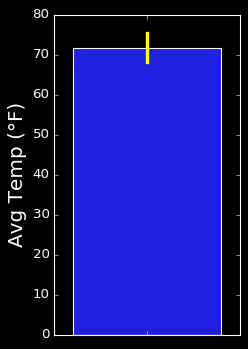

In [75]:
plt.style.use('dark_background')
plt.figure(figsize=(3,5))
sns.barplot(y='Values',data=df_Temp_Analysis,ci=tmax-tmin,errwidth=3,errcolor='yellow', color='blue')
plt.ylabel('Avg Temp (°F)',fontsize=(18));
